In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

### I. Implementation and interpretation
**A. Implement linear regression from scratch by gradient descent that minimizes the sum of squared residuals or maximizes the log-likelihood.**  
**B. Use statsmodels for the rest.**

_1. Import the advertising dataset_

In [2]:
advertising = pd.read_csv('advertising.csv')
advertising.drop(columns='Unnamed: 0', inplace=True)
advertising.rename(columns={'TV': 'tv', 'Radio': 'radio', 'Newspaper': 'newspaper', 'Sales': 'sales'}, inplace=True)

_2. Run a simple linear regression on sales and newspaper advertising, using gradient descent_

General (multi-variate) statement of gradient:
$$ \nabla_{\beta}S = (\frac{\delta{S}}{\delta\beta})^T $$
$$ \quad\text {i.e.} \nabla_{\beta}S = (2\beta^TX^TX - 2Y^TX)^T = 2X^T(Y-X\beta) $$
$$ \quad\text{Simplifying to ignore scale, } \nabla_{\beta}S = X^T(Y-X\beta) $$

General gradient-related function definitions:

In [3]:
def predict(beta, x):
    return np.matmul(x, beta)

In [4]:
def error(beta, x, y):
    return (y - predict(beta, x))

In [5]:
def gradient(x, error):
    return (-1.0 * np.matmul(x.transpose(), error))

In [6]:
sales_mean = advertising.sales.mean()
# reasonable starting values
beta = np.array([sales_mean, ((advertising.sales - sales_mean) / advertising.newspaper).mean()])
rate = 1e-6 # use uniform step size (learning rate)
tol = 1e-6
x = np.hstack((np.ones((advertising.shape[0], 1)),
               np.reshape(advertising.newspaper.values, (advertising.shape[0], 1))))
err = error(beta, x, advertising.sales)
grad = gradient(x, err)
beta_next = beta - rate * grad
iters = 1

while np.sum(abs(beta_next - beta)) > tol:
    iters += 1
    beta = beta_next
    err = error(beta, x, advertising.sales)
    grad = gradient(x, err)
    beta_next = beta - rate * grad
    if iters % 5000 == 0:
        print('Iteration %d. Sum of squared errors = %f' % (iters, np.sum(np.square(err))))
beta = beta_next
print('Converged. Iters: %d. Sum of squared errors = %f' % (iters, np.sum(np.square(err))))
print('Beta: ')
print(beta)

Iteration 5000. Sum of squared errors = 5230.740997
Iteration 10000. Sum of squared errors = 5183.833736
Iteration 15000. Sum of squared errors = 5159.861356
Iteration 20000. Sum of squared errors = 5147.610054
Iteration 25000. Sum of squared errors = 5141.348916
Iteration 30000. Sum of squared errors = 5138.149104
Iteration 35000. Sum of squared errors = 5136.513812
Iteration 40000. Sum of squared errors = 5135.678081
Iteration 45000. Sum of squared errors = 5135.250973
Iteration 50000. Sum of squared errors = 5135.032696
Iteration 55000. Sum of squared errors = 5134.921143
Iteration 60000. Sum of squared errors = 5134.864133
Iteration 65000. Sum of squared errors = 5134.834998
Iteration 70000. Sum of squared errors = 5134.820108
Converged. Iters: 70643. Sum of squared errors = 5134.818820
Beta: 
[12.36598632  0.05437608]


_2a. Run a simple linear regression on sales and newspaper advertising, using statsmodels.  
Compare to the implementation by gradient descent._

In [6]:
newspaper_2d = np.reshape(advertising.newspaper.values, (advertising.shape[0], 1))
sales_2d = np.reshape(advertising.sales.values, (advertising.shape[0], 1))
x = sm.add_constant(newspaper_2d)
model = sm.OLS(sales_2d, x)
results = model.fit()
print('Beta: ')
print(results.params)
print('p-values: ')
print(results.pvalues)
print('R squared = %f' % results.rsquared)
print('Adj. R squared = %f' % results.rsquared_adj)

Beta: 
[12.35140707  0.0546931 ]
p-values: 
[4.71350739e-49 1.14819587e-03]
R squared = 0.052120
Adj. R squared = 0.047333


This fit has a much lower runtime than gradient descent. The parameter estimates obtained by both are close-ish, within 1% of each other.  
However, it's unclear which estimates are better without further investigation (of the gradient descent estimates in particular).

_2b. Plot Sales vs Newspaper and overlay the predicted relationship. Is there a significant relationship? What do the p-values represent statistically?_

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


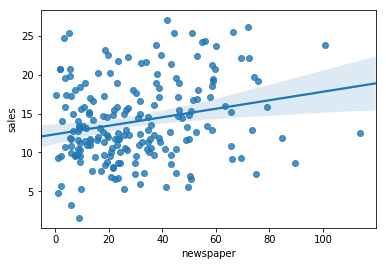

In [7]:
sns.regplot(x='newspaper', y='sales', data=advertising)

b. Going by the p-value (see (a)), there is a (highly) significant relationship even at the 1% level. The relationship seems less certain in the plot: sales values are highly dispersed around the predicted values (overlaid line).  
The p-values represent the probability that OLS coefficients at least as large as those obtained are observed by chance, if the OLS assumptions and null hypothesis of 0 coefficients hold. (There seems to be another assumption about independence of the denominator and numerator used in the t-test.)

_3. Run a multiple linear regression on sales and all three advertising media. What about the relationship between sales and newspaper advertising now?_

First using gradient descent, since the code has already been written

In [ ]:
sales_mean = advertising.sales.mean()
sales_demeaned = advertising.sales - sales_mean
# reasonable starting values
tv_b = (sales_demeaned / advertising.tv).mean()
radio_b = (sales_demeaned / (advertising.radio + 1)).mean()
news_b = (sales_demeaned / advertising.newspaper).mean()
beta = np.array([sales_mean, tv_b, radio_b, news_b])
print(beta)
rate = 1e-7 # use uniform step size (learning rate)
tol = 1e-6
x = np.hstack((np.ones((advertising.shape[0], 1)),
               np.reshape(advertising.tv.values, (advertising.shape[0], 1)),
               np.reshape(advertising.radio.values, (advertising.shape[0], 1)),
               np.reshape(advertising.newspaper.values, (advertising.shape[0], 1))))
err = error(beta, x, advertising.sales)
grad = gradient(x, err)
beta_next = beta - rate * grad
iters = 1

while np.sum(abs(beta_next - beta)) > tol:
    iters += 1
    beta = beta_next
    err = error(beta, x, advertising.sales)
    grad = gradient(x, err)
    beta_next = beta - rate * grad
    if iters % 100000 == 0:
        print('Iteration %d. Sum of squared errors = %f' % (iters, np.sum(np.square(err))))
beta = beta_next
print('Converged. Iters: %d. Sum of squared errors = %f' % (iters, np.sum(np.square(err))))
print('Beta: ')
print(beta)

Then using statsmodels

In [57]:
tv_2d = np.reshape(advertising.tv.values, (advertising.shape[0], 1))
radio_2d = np.reshape(advertising.radio.values, (advertising.shape[0], 1))
newspaper_2d = np.reshape(advertising.newspaper.values, (advertising.shape[0], 1))
sales_2d = np.reshape(advertising.sales.values, (advertising.shape[0], 1))
x_multi = sm.add_constant(np.hstack((tv_2d, radio_2d, newspaper_2d)))
model = sm.OLS(sales_2d, x_multi)
multi_results = model.fit()
print('Beta: ')
print(multi_results.params)
print('p-values: ')
print(multi_results.pvalues)
print('R squared = %f' % multi_results.rsquared)
print('Adj. R squared = %f' % multi_results.rsquared_adj)

Beta: 
[ 2.93888937e+00  4.57646455e-02  1.88530017e-01 -1.03749304e-03]
p-values: 
[1.26729451e-17 1.50995995e-81 1.50533892e-54 8.59915050e-01]
R squared = 0.897211
Adj. R squared = 0.895637


Gradient descent now takes much longer to converge; parameter estimates obtained in each of the methods are also slightly more different now, though still largely similar.  
Influence on sales now seems dominated by TV and radio ads. Going by the p-value of 0.86, the relationship between newspaper advertising and sales is no longer significant, which aligns well with the plot in (2).

_4. Why would a significant predictor with a simple regression disappear with multiple predictors?_

The effect of a significant predictor (say X1) in simple regression could disappear in multiple regression because some or all of the other predictors (say X) are correlated with X1 and more strongly correlated with the outcome (Y). This is suggested by the plots of sales against TV and radio advertising below.  
Geometrically, it happens when the orthogonal projection of X1 onto other Xs (in n-dimensional space) or vice versa is
nonzero, and the (orthogonal) projection of Y onto the residual of X1 orthogonal to other Xs is smaller than its
projection onto the equivalent residuals of other Xs.

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


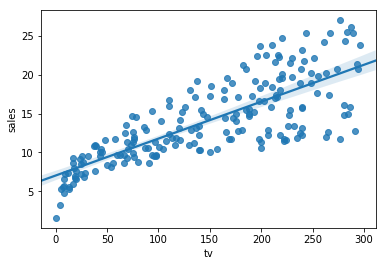

In [9]:
sns.regplot(x='tv', y='sales', data=advertising)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


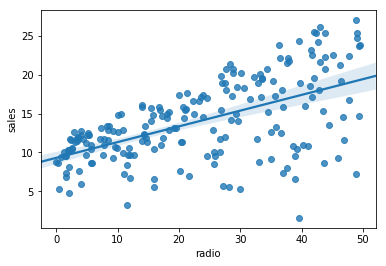

In [10]:
sns.regplot(x='radio', y='sales', data=advertising)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


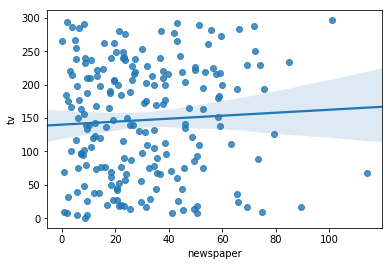

In [11]:
sns.regplot(x='newspaper', y='tv', data=advertising)

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


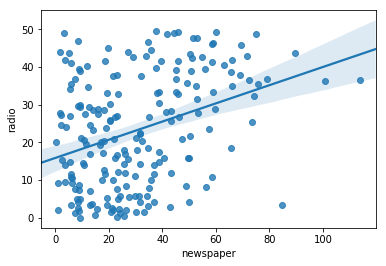

In [12]:
sns.regplot(x='newspaper', y='radio', data=advertising)

### II. Interpretation and extensions

_1. How good is the model fit? What is a good measure of model fit? How to interpret the R-squared value statistically?_

For the multiple linear regression, the $R^2$ is 0.897211 and adjusted $R^2$ is just marginally lower at 0.895637, indicating that the fit of the model as given is pretty good. (They don't indicate whether the model may be improved, e.g. by changing the explanatory variables used.) The $R^2$ is not a reliable indicator of model fit, given that it is non-decreasing (often spuriously increasing) with the number of explanatory variables used, p; adjusted $R^2$ attempts to account for p and is more appropriate for comparing alternative models (especially with large differences in p).

_2. Obtain the 95% confidence intervals around the model parameter estimates. What is the distinction between prediction interval and confidence intervals?_

In [13]:
results.conf_int() # default alpha = 0.05

array([[11.1259556 , 13.57685854],
       [ 0.02200549,  0.08738071]])

The confidence interval for the dependent variable, Y, is based on the CIs for the parameter estimates ($\beta$), giving a range for E(Y|X). It accounts for uncertainty in sampling and would be 0 if $\beta$ were estimated perfectly. The prediction interval for Y gives a range for Y; it includes the CI (for Y), as well as uncertainty arising from the "true error" of natural variability of individual observations around the mean, i.e. $\epsilon$.

_3. Suppose our data has certain qualitative variables, e.g. gender, ethnicity etc. How would we incorporate these into a 
linear regression model?_

We could incorporate these into a linear regression model as:
1. Discrete-valued variables (e.g. with values 0 or 1, or as integers).
2. Independently and/or with interactions with other variables (discrete or continuous).

_4. Incorporate some interaction effects in your model. Did you adhere to the hierarchical principle?_

In [90]:
# Intuitively, since newspaper advertising seems unimportant on its own, I suspect its interactions will also be of
# little interest. However, interaction between TV and radio may be revealing.
x_transformed = StandardScaler().fit_transform(advertising[['tv', 'radio', 'newspaper']])
tv_radio = np.reshape(x_transformed[:,0] * x_transformed[:,1], (advertising.shape[0], 1))
x_inter = sm.add_constant(np.hstack((x_transformed, tv_radio)))
model = sm.OLS(sales_2d, x_inter)
inter_results = model.fit()
print('Beta: ')
print(inter_results.params)
print('p-values: ')
print(inter_results.pvalues)
print('R squared = %f' % inter_results.rsquared)
print('Adj. R squared = %f' % inter_results.rsquared_adj)

Beta: 
[13.946916    3.79917818  2.7823751   0.03137492  1.37905199]
p-values: 
[5.00520581e-231 8.09045629e-123 7.93828057e-094 6.61687635e-001
 4.55662464e-051]
R squared = 0.967822
Adj. R squared = 0.967162


Here, I standardised the predictor variables because the interaction effect values are of a different order of magnitude from the other variables.

There does indeed seem to be a sizeable and highly significant interaction effect between TV and radio advertising on sales.  

As far as I understand, hierarchical regression is done on nested (or effectively nested, e.g. repeated-observation) data, which this dataset doesn't seem to contain, so no, this last regression does not adhere to the hierarchical principle?

### III. Assumptions and Diagnostics

_1. What are the assumptions made in the linear regression model with respect to the errors?_

That the errors are i.i.d. with mean 0 and uniform variance.

_2. The assumptions can be verified by plotting the residuals $e_i$ versus the predictor $x_i$. Ideally, how should the residual plot look like?_

The plot should have points uniformly scattered around 0 on the y-axis across all x values, i.e. with no visible
relationship between $x_i$ and $y_i$.

_3. The normality of errors can be verified by plotting the quantile-quantile (Q-Q) plot._  
_4. Obtain the Q-Q plot and the residual plots for the above linear regression models._

Use sm.qqplot with default standard normal error distribution

For simple linear regression on newspaper advertising:  
The error quantile distribution seems fairly symmetric, albeit inflated relative to the theoretical quantiles. This could be due to the low explanatory power of newspaper advertising.  
The distribution across predicted values is slightly uneven, with a slight dip around 14.

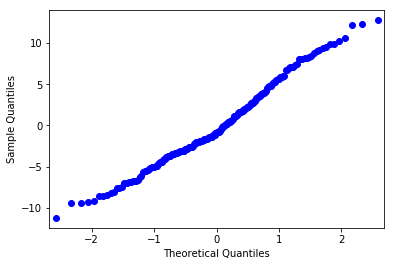

In [15]:
fig = sm.qqplot(results.resid) # assignment somehow prevents display of duplicate plots

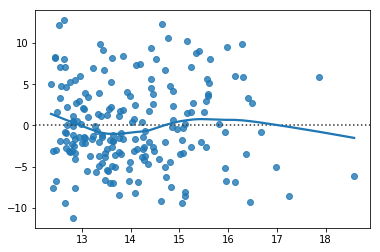

In [16]:
sns.residplot(results.predict(), results.resid, lowess=True)

For multiple linear regression on advertising in all media:  
The quantile distribution is rather asymmetric, with a negative skew. It is, however, considerably less inflated in value than the residuals from the simple linear regression above, and well-matched (in value) with the theoretical quantiles in the top half of the distribution.  
That said, the residual distribution across predicted values is clearly "convex", markedly lower in the centre than at more extreme predicted values.

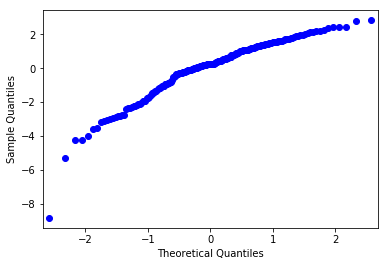

In [17]:
fig = sm.qqplot(multi_results.resid) # assignment somehow prevents display of duplicate plots

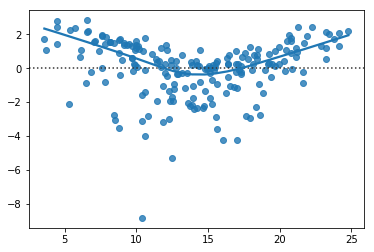

In [18]:
sns.residplot(multi_results.predict(), multi_results.resid, lowess=True)

In [24]:
stats.describe(multi_results.predict())

DescribeResult(nobs=200, minmax=(3.587258409805006, 24.78687031418369), mean=14.022499999999997, variance=24.423736116069435, skewness=0.07148887243044166, kurtosis=-0.7826104796167601)

For regression with interaction effect:  
Like the last case, the range of residuals is similar to the theoretical one although again somewhat negatively skewed. In contrast however, the distribution is well-matched to the theoretical one in its lower half, though it becomes more extreme <= -2.  
The resitual plot is again uneven though less so, with a slight bump around 11 and clear negative skew <= 10.

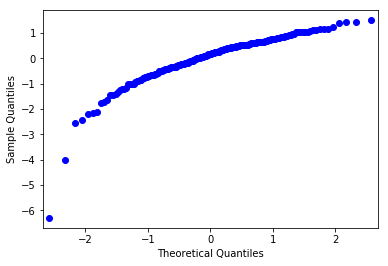

In [78]:
fig = sm.qqplot(inter_results.resid) # assignment somehow prevents display of duplicate plots

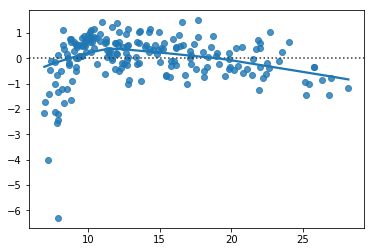

In [79]:
sns.residplot(inter_results.predict(), inter_results.resid, lowess=True)

All the residual-related plots I produced seemed problematic. Assuming I didn't mess something up (big if???), it could be because the (multiple-regression) models have less predictive accuracy at more extreme (predicted) values of the response variable. The coefficient on the interaction variable seems to be "overcompensating" near the edges. A more detailed analysis of the characteristics of oservations across various ranges of the dependent variables might suggest an explanation and possible improvements.

### IV. Weighted regression

_1. Please solve the minimization and derive the weighted least square estimators analytically._

\begin{equation}
W\,RSS = \frac{1}{n}(y-X\beta)^TW(y-X\beta) = \frac{1}{n}[Y^TWY - (X\beta)^TWY - Y^TWX\beta + (X\beta)^TWX\beta] = \frac{1}{n}[Y^TWY - 2Y^TWX\beta + (X\beta)^TWX\beta] \\
\implies \frac{\delta WRSS}{\delta\beta} = (X\hat{\beta})^TWX + (X\hat{\beta})^TW^TX - 2Y^TWX = 2(X\hat{\beta})^TWX - 2Y^TWX = 0 \implies (X\hat{\beta})^TWX = Y^TWX \\
\iff \hat{\beta}^TX^TWX = Y^TWX \iff (\hat{\beta}^TX^TWX)^T = (Y^TWX)^T \iff X^TW^TX\hat{\beta} = X^TW^TY \iff X^TWX\hat{\beta} = X^TWY \\
\iff \hat{\beta} = (X^TWX)^{-1}X^TWY
\end{equation}

_2. Use this solution to fit a weighted least squares to the advertising data. How does it differ from your original OLS?_

I try to fit the model with interaction effect using WLS.  

A suggested procedure for weighted least squares using estimated residual variances is as follows:
1. Estimate residuals using default regression method (e.g. OLS), $r_i$
2. Compute $z_i = log(r_i^2)$
3. Use appropriate non-parametric method to estimate conditional mean of $z_i$, $\hat{q}(x_i)$
4. Use $\sigma_i^2 = e^{\hat{q}(x_i)}$ in WLS

The following plots indicate a non-linear increase in residual values as distance from the centre (e.g. mean) increases in TV and newspaper advertising, and in the interaction between (standardised) TV and radio advertising. The residual distribution seems more uniform across radio advertising values.

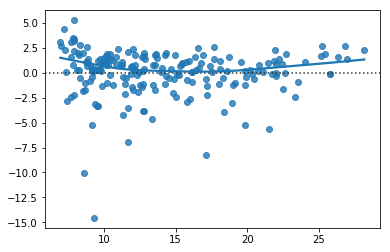

In [93]:
sns.residplot(inter_results.predict(), np.log(np.square(inter_results.resid)), lowess=True)

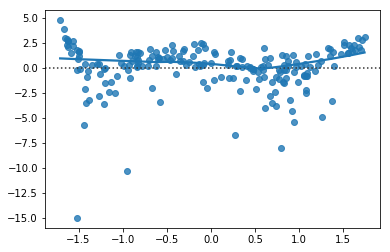

In [94]:
sns.residplot(x_transformed[:,0], np.log(np.square(inter_results.resid)), lowess=True)

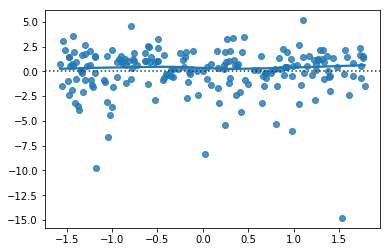

In [95]:
sns.residplot(x_transformed[:,1], np.log(np.square(inter_results.resid)), lowess=True)

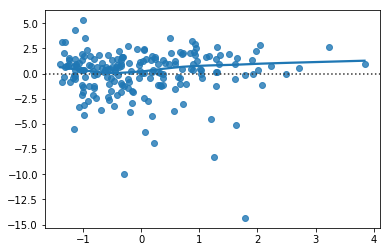

In [96]:
sns.residplot(x_transformed[:,2], np.log(np.square(inter_results.resid)), lowess=True)

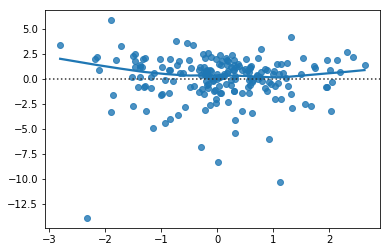

In [92]:
sns.residplot(tv_radio.flatten(), np.log(np.square(inter_results.resid)), lowess=True)

Since I'm not familiar with any non-parametric regression methods, a reasonable (parametric?) alternative I can think of, based on the following plots, is to estimate the conditional mean of $z_i$ by fitting a quadratic function to the mean of TV advertising, newspaper advertising, and the interaction of TV and radio advertising.  

I also tried predicting (log of squared) residuals by OLS on squared TV advertising, newspaper advertising, and TV * radio advertising, but the results seemed to be of similar (even slightly worse) quality.

In [174]:
x_weighted = (x_transformed[:,0] + x_transformed[:,2] + tv_radio.flatten()) / 3

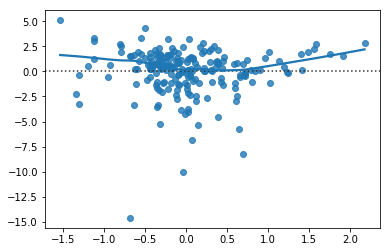

In [175]:
sns.residplot(x_weighted, np.log(np.square(inter_results.resid)), lowess=True)

Plotting the difference between (the log of squared) actual and predicted residuals against that mean suggests that it's a good predictor of residual value, supporting its usage for obtaining variances for WLS.

In [178]:
beta_log_residsqr = np.polyfit(x_weighted, np.log(np.square(inter_results.resid)), 2)
pred_log_residsqr = beta_log_residsqr[0] * np.square(x_weighted) + beta_log_residsqr[1] * x_weighted + beta_log_residsqr[2]

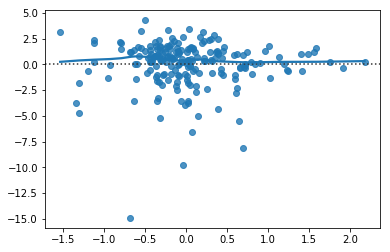

In [180]:
sns.residplot(x_weighted, np.log(np.square(inter_results.resid)) - pred_log_residsqr, lowess=True)

In [214]:
w = np.diag(1.0/np.exp(pred_log_residsqr))
x_t = x_inter.transpose()
xt_w = np.matmul(x_t, w)
beta = np.matmul(np.linalg.inv(np.matmul(xt_w, x_inter)), np.matmul(xt_w, sales_2d))

In [224]:
wls_pred = np.matmul(x_inter, beta)
wls_resid = sales_2d - wls_pred

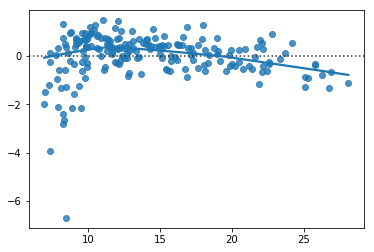

In [225]:
sns.residplot(wls_pred.flatten(), wls_resid.flatten(), lowess=True)

In [227]:
stats.describe(wls_resid.flatten())

DescribeResult(nobs=200, minmax=(-6.8625356231184025, 1.354407184379479), mean=-0.10927752067860044, variance=0.9046530498566778, skewness=-2.6766501087889685, kurtosis=13.384670547163545)

In [186]:
stats.describe(inter_results.resid)

DescribeResult(nobs=200, minmax=(-6.292934286820037, 1.5008830508071647), mean=1.616484723854228e-15, variance=0.8759381584824801, skewness=-2.290659036369254, kurtosis=10.668975337913588)

The residual distribution appears qualitatively similar; in fact, a summary indicates that the mean is much and variance slightly larger than before (compare the preceding two cells). It appears that I was unable to get better results using these weights in WLS.

_3. Why would we weight by the inverse of the variance $\frac{1}{\sigma_i^2}$?_

Because the larger the noise (variance) at a given value/region of the predictor variables, the less accurately we can estimate the OLS model parameters; weighting all value equally would simply decrease parameter estimate accuracy. Therefore, we should weight noisier regions less and less noisy ones more.